In [99]:
#loading the required packages
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [100]:
ipl_data = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')
ipl_data

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0
176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
ipl_data.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

In [102]:
ipl_data = ipl_data.dropna(axis=0)

In [103]:
ipl_data.head(20)

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0


In [104]:
#checking for the rows and columns of the data
rows, column = ipl_data.shape
print('The dataset has', rows, 'rows and', column, 'columns.')

The dataset has 90 rows and 7 columns.


In [105]:
ipl_data.columns

Index(['Name', 'Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF'], dtype='object')

In [106]:
print(ipl_data['Name'].dtypes)
print(ipl_data['Runs'].dtypes)
print(ipl_data['Ave'].dtypes)
print(ipl_data['SR'].dtypes)
print(ipl_data['Fours'].dtypes)
print(ipl_data['Sixes'].dtypes)
print(ipl_data['HF'].dtypes)

object
float64
float64
float64
float64
float64
float64


In [107]:
#checking for the data type
print('The data type of each attribute: \n')
ipl_data.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [108]:
ipl_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


In [109]:
print('Duplicated rows: ', ipl_data[ipl_data.duplicated()].shape[0])

Duplicated rows:  0


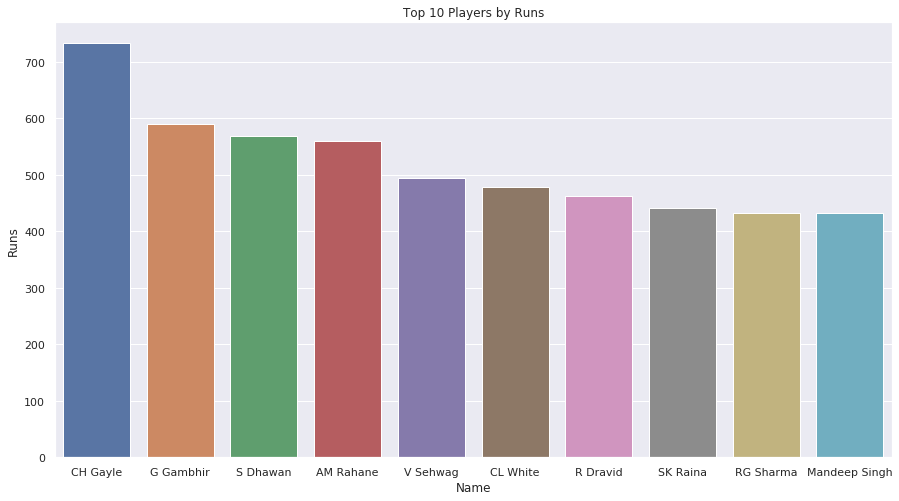

In [110]:
plt.figure(figsize=(15,8))
b1=ipl_data.groupby('Name')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Runs']
sns.barplot(data= b1 , x= 'Name' , y ='Runs');
plt.title("Top 10 Players by Runs");

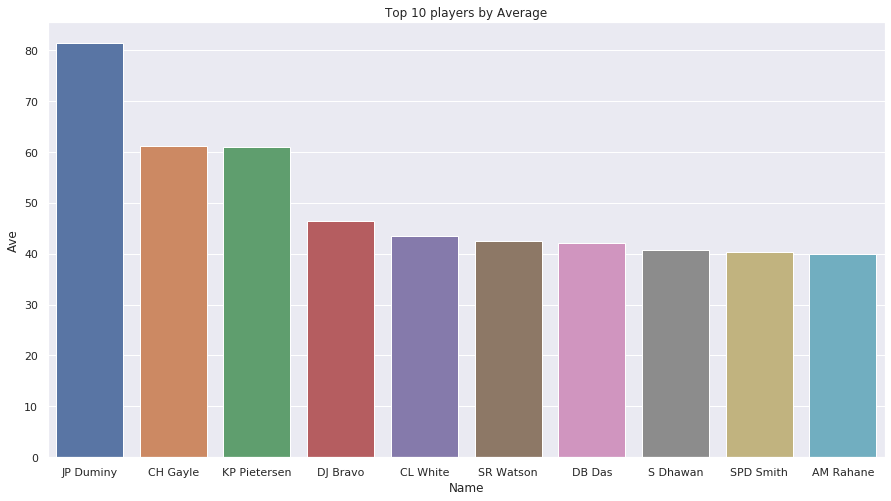

In [111]:
plt.figure(figsize=(15,8))
b1=ipl_data.groupby('Name')['Ave'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Ave']
sns.barplot(data= b1 , x= 'Name' , y ='Ave')
plt.title("Top 10 players by Average");

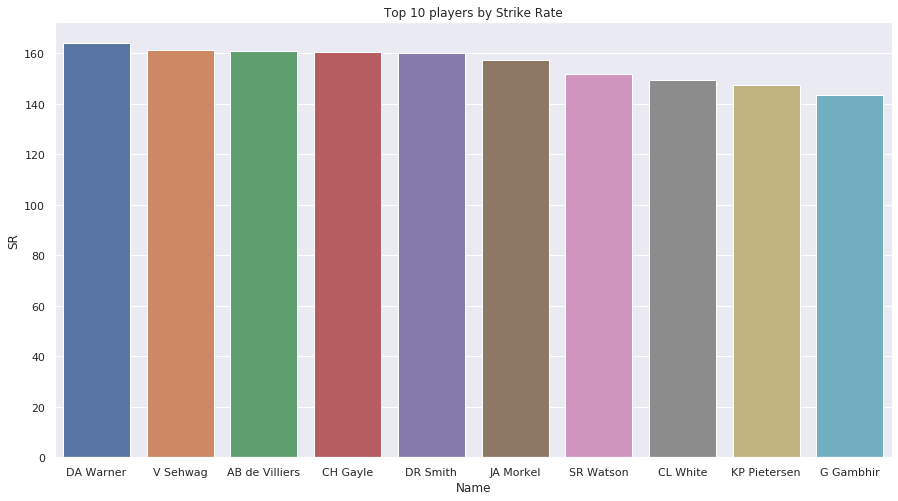

In [112]:
plt.figure(figsize=(15,8))
b1=ipl_data.groupby('Name')['SR'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'SR']
sns.barplot(data= b1 , x= 'Name' , y ='SR')
plt.title("Top 10 players by Strike Rate");

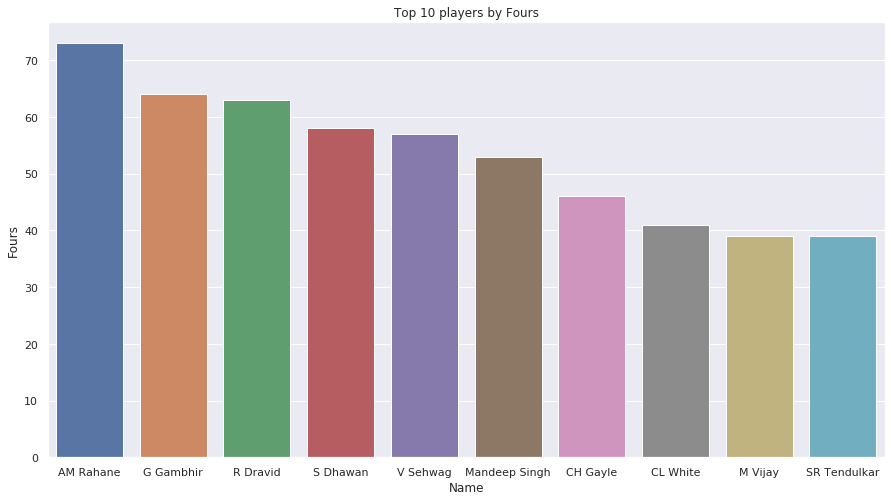

In [113]:
plt.figure(figsize=(15,8))
b1=ipl_data.groupby('Name')['Fours'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Fours']
sns.barplot(data= b1 , x= 'Name' , y ='Fours')
plt.title("Top 10 players by Fours");

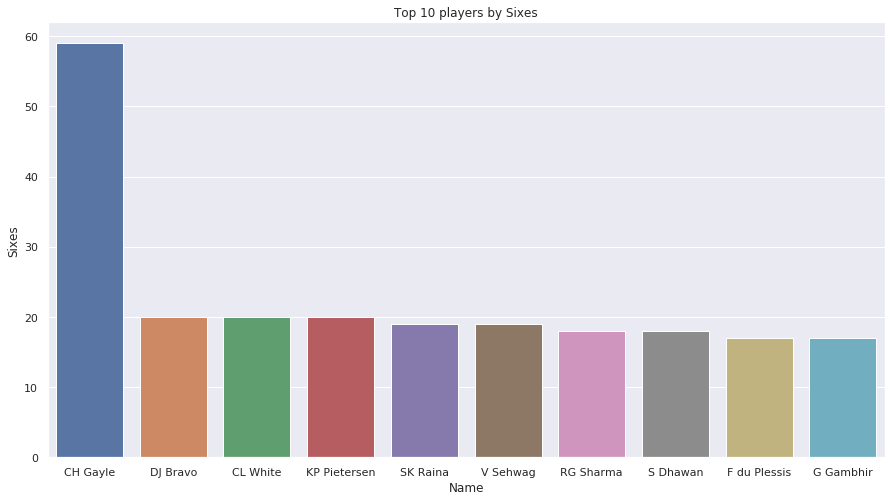

In [114]:
plt.figure(figsize=(15,8))
b1=ipl_data.groupby('Name')['Sixes'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'Sixes']
sns.barplot(data= b1 , x= 'Name' , y ='Sixes')
plt.title("Top 10 players by Sixes");

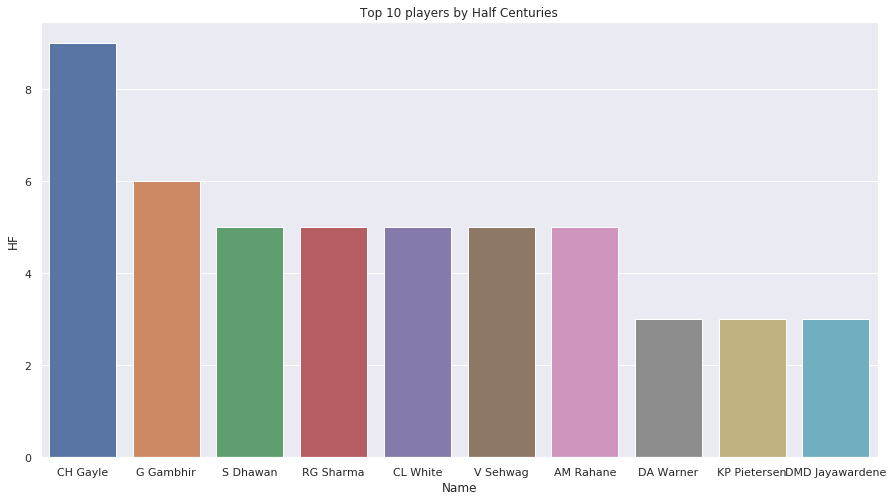

In [115]:
plt.figure(figsize=(15,8))
b1=ipl_data.groupby('Name')['HF'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Name' ,'HF']
sns.barplot(data= b1 , x= 'Name' , y ='HF')
plt.title("Top 10 players by Half Centuries");

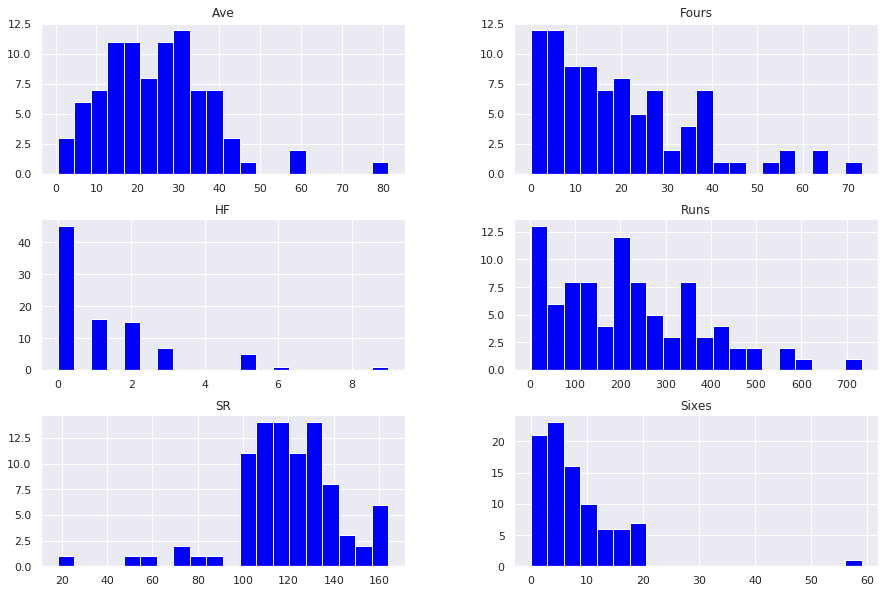

In [116]:
ipl_data.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

# Univariate Analysis

Mean 219.93333333333334
Median 196.5
Mode 0     35.0
1    220.0
dtype: float64


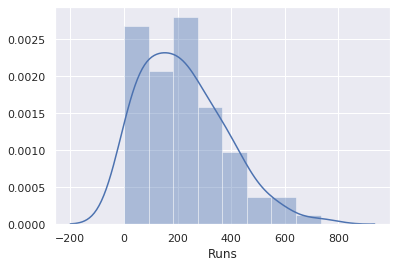

In [117]:
sns.distplot(ipl_data['Runs'])
print('Mean',ipl_data['Runs'].mean())
print('Median',ipl_data['Runs'].median())
print('Mode',ipl_data['Runs'].mode())

The dist plot for Runs is a bit right skewed which means Mean > Median

Mean 24.729888888888883
Median 24.44
Mode 0     6.00
1    11.66
2    24.44
3    27.00
4    28.00
5    33.00
dtype: float64


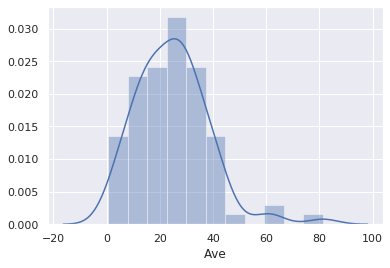

In [118]:
sns.distplot(ipl_data['Ave'])
print('Mean',ipl_data['Ave'].mean())
print('Median',ipl_data['Ave'].median())
print('Mode',ipl_data['Ave'].mode())

Ave is approx normally distributed with Mean ~ Median . But the mode is improper

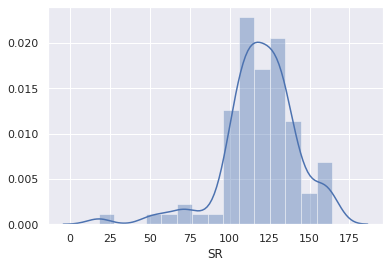

In [119]:
sns.distplot(ipl_data['SR'])

The graph shows that SR data is left skewed , i.e. Mean < Median

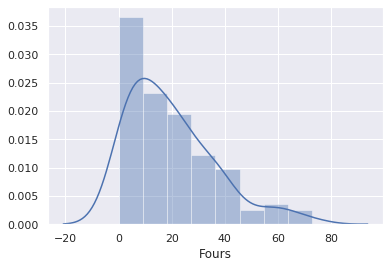

In [120]:
sns.distplot(ipl_data['Fours'])

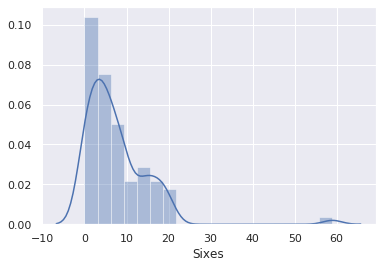

In [121]:
sns.distplot(ipl_data['Sixes'])

The data for sixed is right skewed i.e Mean > Median

# Multivariate Analysis

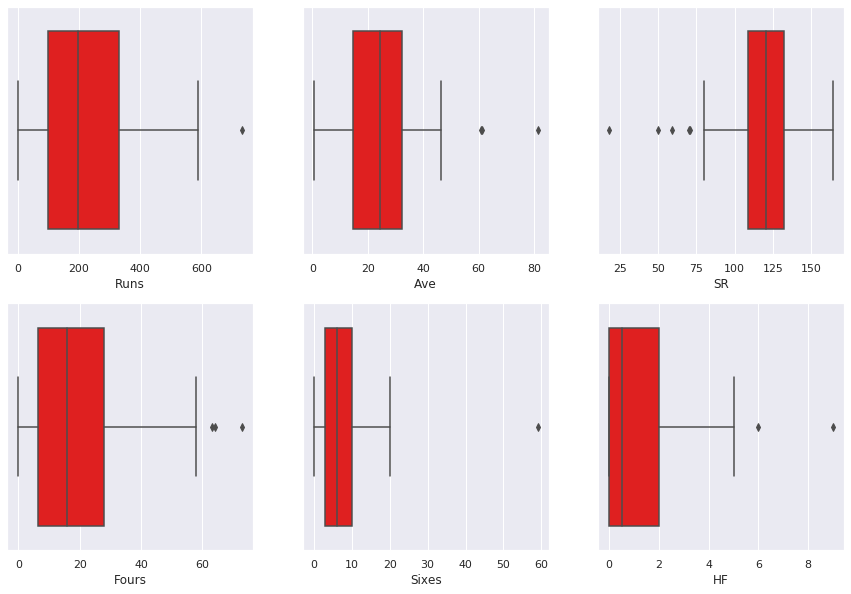

In [122]:
plt.figure(figsize=(15, 10))
col = 1
for i in ipl_data.drop(columns='Name').columns:
    plt.subplot(2, 3, col)
    sns.boxplot(ipl_data[i],color='red')
    col += 1

There are few outliers in each column but we will not be treating them since it is from genuine observation

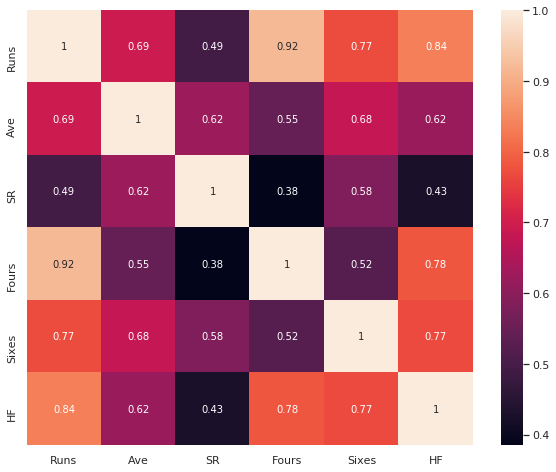

In [123]:
#checking for correlation
plt.figure(figsize=(10,8))
corr = ipl_data.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

The above correlation heat map draws a conclusion that :
- Number of fours is highly correlated with the runs scored which means if a player has scored more number of runs then he has scored more number of fours 
- HF is also nicely correlated with fours and sixes. whereas number of fours and sixes are not much correlated with each other. We can say that fours and sixes are independent of each other.
- Strike Rate is least correlated with fours which means both are independent of each other.
- Strike Rate & Average can be an important features as these are less correlated and more independent.

## By looking at the data we can assume that the players with Good SR and Ave can be selected 

In [124]:
#scaling the numeric variables
scaled_data = ipl_data.iloc[:,1:7] 
scaled_data1 = scaled_data.apply(zscore)
scaled_data1.head()

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533


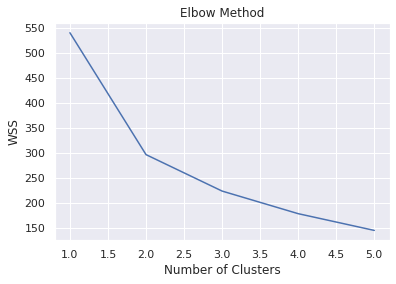

In [125]:
#checking for the within sum of squares
wss =[] 
for i in range(1,6):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_data1)
    wss.append(KM.inertia_)

#plotting to check for optimal clustres 
plt.plot(range(1,6), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [126]:
#using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_data1)
labels = k_means.labels_

In [127]:
# Calculating silhouette_score
silhouette_score(scaled_data1,labels)

0.41111085574076756

In [128]:
#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data1)
    score = silhouette_score(scaled_data1,kmeans.labels_)
    silhouette_coefficients.append(score)

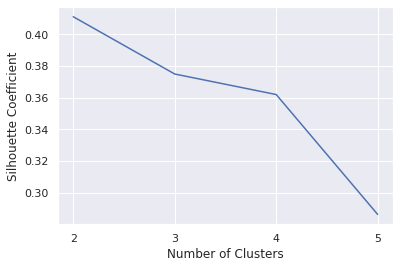

In [129]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [130]:
#attaching the labels to the original data
ipl_data['Cluster']=labels
ipl_data.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF,Cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,1
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,1
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,1
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,1
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,1


In [131]:
#veiwing the distribution of the clusters
ipl_data.Cluster.value_counts().sort_index()

0    55
1    35
Name: Cluster, dtype: int64

In [133]:
#aggregating the clusters with the numeric variables with their mean
aggdata=ipl_data.iloc[:,0:9].groupby('Cluster').mean()
aggdata['Freq']=ipl_data.Cluster.value_counts().sort_index()
aggdata

,Runs,Ave,SR,Fours,Sixes,HF,Freq
Cluster,,,,,,,
0,122.745455,17.582000,110.481455,10.309091,3.636364,0.218182,55
1,372.657143,35.962286,132.808286,34.685714,13.771429,2.714286,35


In [135]:
#based on the above table renaming/ranking the playes in Grade A and Grade B
ipl_data['Cluster'] = ipl_data['Cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [136]:
#list of Grade A players
Grade_A = ipl_data[ipl_data['Cluster'] == 'Grade A']
Grade_A.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Cluster
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,Grade A
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,Grade A
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,Grade A
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,Grade A
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,Grade A
11,AM Rahane,560.0,40.00,129.33,73.0,10.0,5.0,Grade A
13,KP Pietersen,305.0,61.00,147.34,22.0,20.0,3.0,Grade A
15,RG Sharma,433.0,30.92,126.60,39.0,18.0,5.0,Grade A
17,AB de Villiers,319.0,39.87,161.11,26.0,15.0,3.0,Grade A
19,JP Duminy,244.0,81.33,128.42,13.0,11.0,2.0,Grade A


In [137]:
#list of Grade A players
Grade_B = ipl_data[ipl_data['Cluster'] == 'Grade B']
Grade_B.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF,Cluster
69,MS Bisla,213.0,30.42,133.12,16.0,10.0,1.0,Grade B
73,BJ Hodge,245.0,30.62,140.00,18.0,9.0,0.0,Grade B
75,NV Ojha,255.0,23.18,113.83,21.0,13.0,1.0,Grade B
77,DB Das,126.0,42.00,135.48,9.0,6.0,0.0,Grade B
79,AC Gilchrist,172.0,34.40,120.27,21.0,4.0,1.0,Grade B
81,BB McCullum,289.0,24.08,102.12,37.0,3.0,1.0,Grade B
83,IK Pathan,176.0,25.14,139.68,14.0,6.0,0.0,Grade B
85,Azhar Mahmood,186.0,23.25,130.98,16.0,8.0,0.0,Grade B
87,MK Pandey,143.0,20.42,127.67,12.0,6.0,1.0,Grade B
89,S Badrinath,196.0,28.00,108.28,23.0,2.0,1.0,Grade B


These are the list of Grade A & Grade B players through which a company x can take business decisions

- Created By Akshat Dave 